<a href="https://colab.research.google.com/github/BinduGGowda/Cat-v-s-Dog-detection-using-Artificial-Intelligence/blob/main/Cat_v_s_Dog_detection_using_Artificial_Intelligence_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:05<00:00, 188MB/s]
100% 1.06G/1.06G [00:05<00:00, 223MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 86s 116ms/step - loss: 1.0827 - accuracy: 0.6204 - val_loss: 0.6298 - val_accuracy: 0.6774
Epoch 2/10
625/625 [==============================] - 79s 126ms/step - loss: 0.6051 - accuracy: 0.6906 - val_loss: 0.5806 - val_accuracy: 0.6946
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4822 - accuracy: 0.7664 - val_loss: 0.5376 - val_accuracy: 0.7286
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4135 - accuracy: 0.8124 - val_loss: 0.5790 - val_accuracy: 0.6942
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3413 - accuracy: 0.8510 - val_loss: 0.6546 - val_accuracy: 0.6884
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2854 - accuracy: 0.8767 - val_loss: 0.4968 - val_accuracy: 0.7682
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.1966 - accuracy: 0.9186 - val_loss: 0.5093 - val_ac

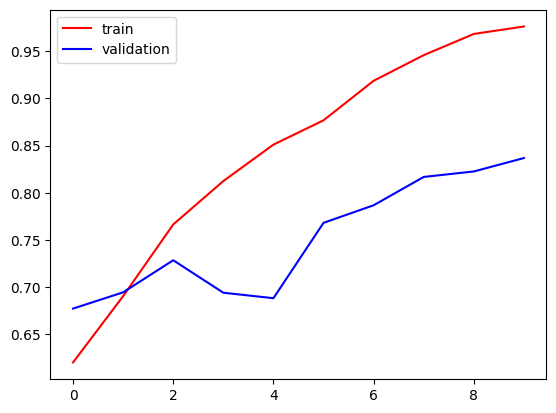

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

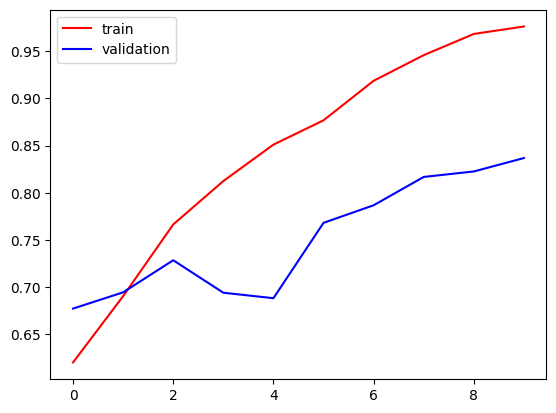

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

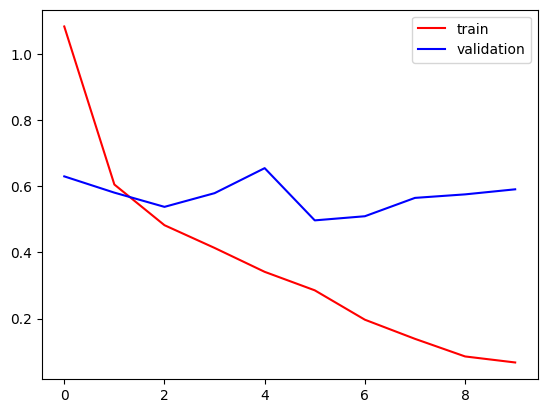

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

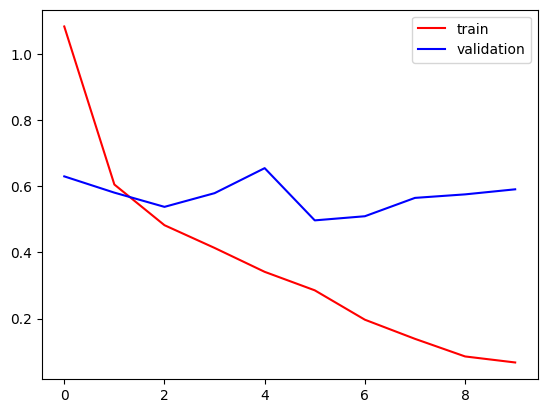

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

***# ways to reduce overfitting***
*   Add more data
*   Data Augmentation 
*   L1/L2 Regularizer
*   Dropout
*   Batch Norm
*   Reduce complexity






In [15]:
import cv2

In [18]:
test_img = cv2.imread('/content/dog.jfif')

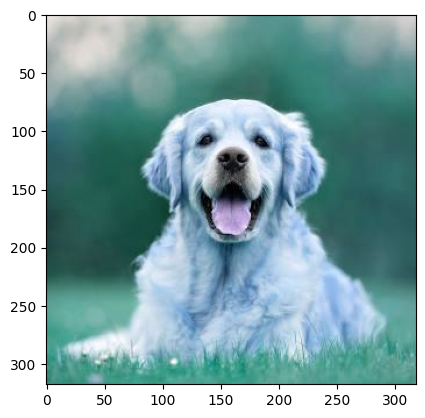

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(318, 318, 3)

In [21]:
test_img = cv2.resize(test_img,(256,256))

In [22]:
test_input = test_img.reshape((1,256,256,3))

In [23]:
result=model.predict(test_input)

1/1 [==============================] - 0s 259ms/step


In [24]:
if int(result)==0:
  print("The animal in the image is cat")
elif int(result)==1:
  print("The animal in the image is dog")
else:
  print("The image is not a cat or dog")

The animal in the image is dog
